In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics 
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB


# Objective
Counter-Strike: Global Offensive (CS:GO) is a multiplayer online shooting game developed by Valve. There are multiple game modes in CS:GO, however, the most prominent and widely played mode is called Competitive, in which two teams, also known as Terrorists (T) and Counter-Terrorists (CT), of 5 members will play against each other for a maximum of 30 rounds. The Terrorists’ objective each round is to plant a bomb or eliminate all the Counter-Terrorists, while the Counter-Terrorists’ goal is to defuse the planted bomb or eliminate all the Terrorists before the bomb is planted. 

During gameplay, there are various factors that will help each team gain their advantages in each round. For instance, if a player has armor, the intake damage will be reduced, hence he will not be eliminated as fast as those who do not have armor. Some other factors are firepower (pistols, rifles, grenades), the number of players alive, or the number of defuse kits. The problem that this project is trying to solve is how to use those factors and analyze them to predict which team will come out on top.


# Dataset information
The dataset used in this project is “CS:GO Round Winner Classification” by Christian Lillelund. Below is the link to the dataset on Kaggle: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

The dataset contains snapshots of around 700 Competitive CS:GO games in 2019 and 2020. The snapshots are recorded 20 seconds between each other until the round ends. There are a total of 122411 snapshots, corresponding to 122411 rows and 97 features (The weapons that the Terrorists have, the amount of armor the Counter-Terrorists have, etc.), corresponding to 97 columns. Below is a fragment of the dataset.


In [3]:
df = pd.read_csv("csgo_round_snapshots.csv")
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


# Explanatory Data Analysis

## Variable identification
In variable identificaiton, we first look at the data types of each feature, then decide which features are predict variables and which ones are target variables.

In [4]:
# Checking the types of data using dtypes 
datatype = df.dtypes
print(datatype)

time_left                    float64
ct_score                     float64
t_score                      float64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                  object
Length: 97, dtype: object


In [5]:
# Get a list of non numerical featuers so we can do label encoding in pre-processing
non_numerical_features = datatype[(datatype == 'object') | (datatype == 'category') | (datatype == "bool")].index.tolist()
print(non_numerical_features)

['map', 'bomb_planted', 'round_winner']


Based on the features above, the first 96 features will be used as predictors and the **round_winner** feature will be used as a target variable.

## Metrics Analysis
In this step, we look at the basic metrics of the variables in the dataset such as the mean, standard deviation, or maximum value.

In [6]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


We can see that there is a great difference between the metrics of the variables, so we might consider Normalization or Standardization methods later.

## Null and missing values detection
Here, we check for null and missing values in the dataset in order to perform missing value treatment later.

In [7]:
# Check for the count or missing values
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [8]:
# Or we can just check to see if there are any missing values
df.isnull().values.any()

False

In [9]:
# df.info() is another way to look at the data type and non null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

As we can see, the dataset is complete so there is no need for imputation in data preprocessing.

## Univariate analysis
In this step, we look at each feature separately and find out its range, distribution or variance. Since the dataset has 96 features, I will only show some of the visualizations here.

C:\Users\truon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Round winners distribution')

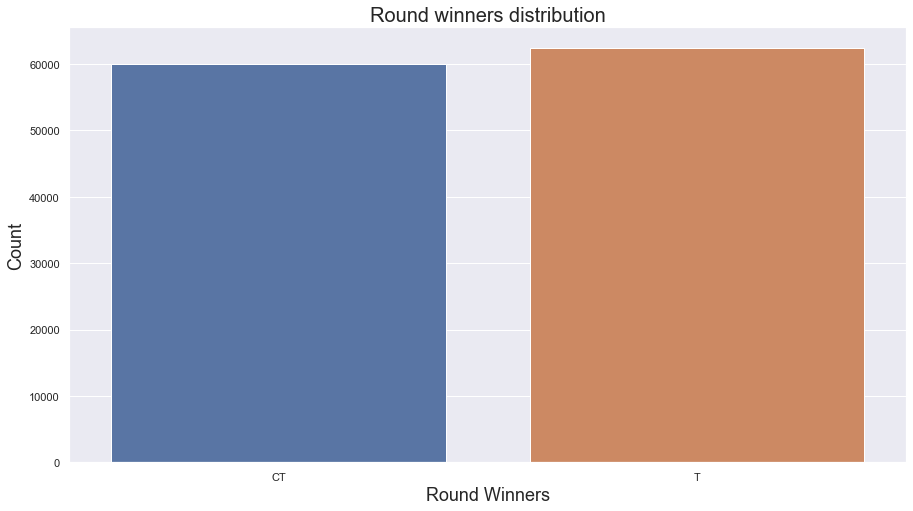

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(df["round_winner"])
p.set_xlabel("Round Winners", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("Round winners distribution", fontsize = 20)

Text(0.5, 1.0, 'CT Scores distribution')

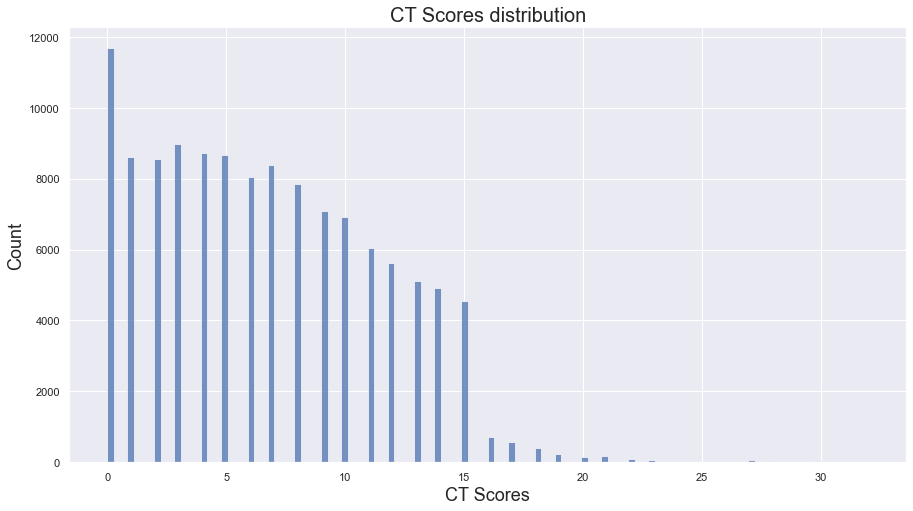

In [11]:
p = sns.histplot(df["ct_score"])
p.set_xlabel("CT Scores", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("CT Scores distribution", fontsize = 20)

Text(0.5, 1.0, 'T Scores distribution')

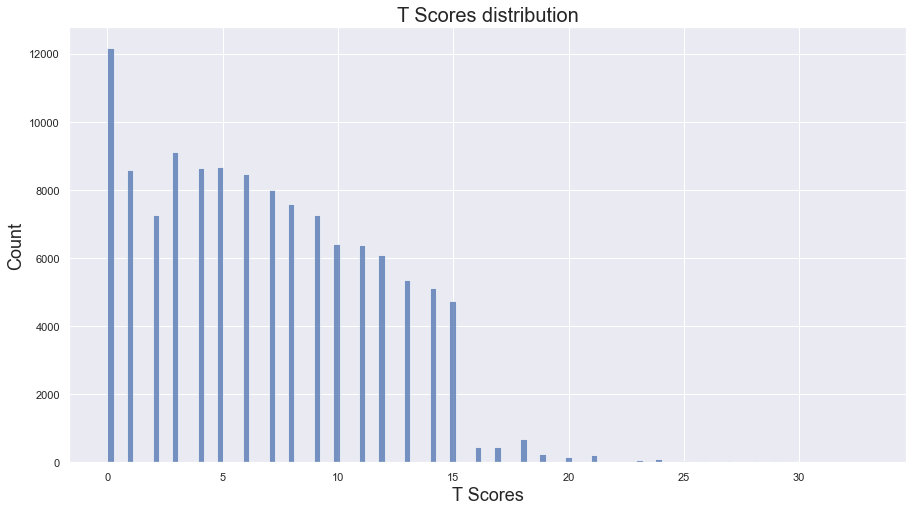

In [12]:
p = sns.histplot(df["t_score"])
p.set_xlabel("T Scores", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("T Scores distribution", fontsize = 20)


## Bivariate analysis
Here we look at the relationship between two variables.


Text(0.5, 1.0, 'Map vs Round Winners')

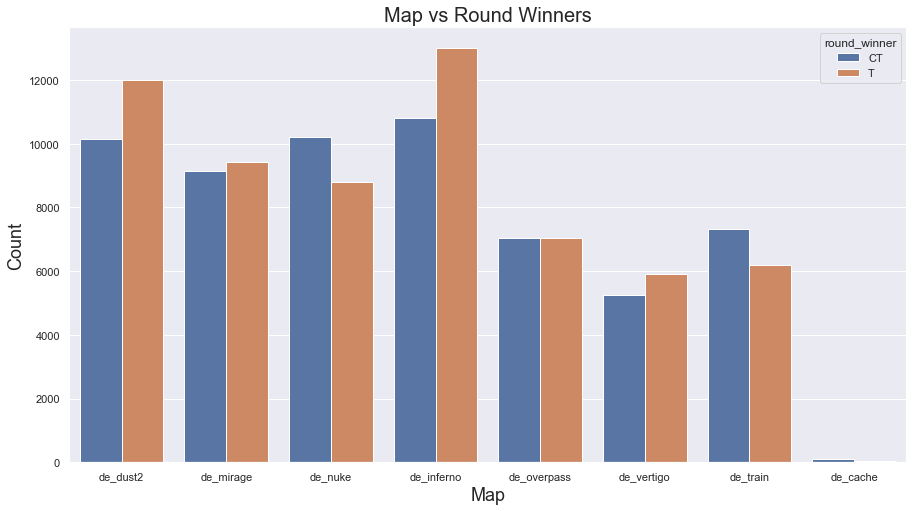

In [13]:
p = sns.countplot(x=df["map"], hue = "round_winner", data = df )
p.set_xlabel("Map", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("Map vs Round Winners", fontsize = 20)

Text(0.5, 1.0, 'Defuse kits vs Round Winners')

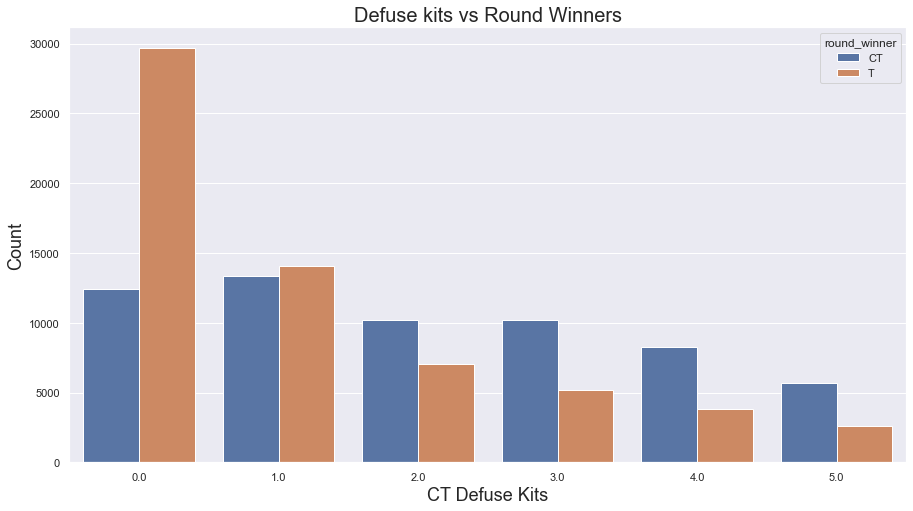

In [14]:
p = sns.countplot(x=df["ct_defuse_kits"], hue = "round_winner", data = df )
p.set_xlabel("CT Defuse Kits", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("Defuse kits vs Round Winners", fontsize = 20)

Text(0.5, 1.0, 'CT Awps vs Round Winners')

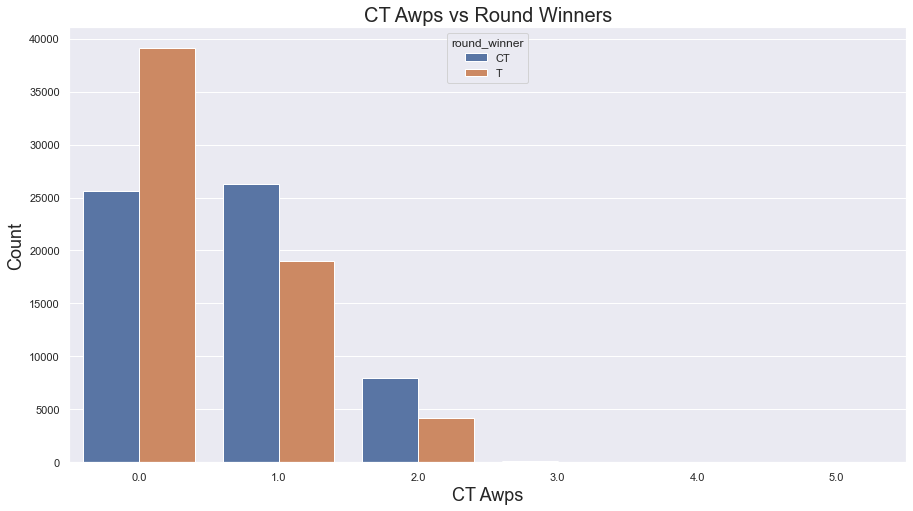

In [15]:
p = sns.countplot(x=df["ct_weapon_awp"], hue = "round_winner", data = df )
p.set_xlabel("CT Awps", fontsize = 18)
p.set_ylabel("Count", fontsize = 18)
p.set_title("CT Awps vs Round Winners", fontsize = 20)

# Data processing

Before performing data pre-processing, it is important to split the data into two sets, one for testing and one for training, and then preprocess them separatedly. The reason for this is because the testing set is crucial to validate how the model will work with unseen data, so if the testing set is pre-processed too, the model may produce biased results that seem better than in reality. However, since I later found out that imputation is not neccessary, I can do label encoding and feature selection for the whole dataset.


## Missing value treatment
We don't do that here.


## Label encoding
Because we might encounter categorical variables that are not numerical in the dataset, it is wise to use label encoding to transform the data into numerical values so that the algorithm can handle it. For example, if the value of the “bomb_planted” column is either True or False, we can convert it into 1 or 0.

In [16]:
# Label encoding non numerical data
le = preprocessing.LabelEncoder()
df["map"] = le.fit_transform(df["map"])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


## Feature selection
Because the dataset has many features, and not every feature is good for analysis, we may want to select the best features only. We can look at the “Select K best” method to select a certain number of features, or we can create a threshold to eliminate features with low variances.  

In [17]:
X = df.drop('round_winner', axis = 1)
y = df["round_winner"]

In [18]:
cols = X.columns
print(cols)

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [19]:
# Removing columns with too little variance
sel = VarianceThreshold()
new_X = sel.fit_transform(X)
new_columns = df.columns[sel.get_support(indices=True)]
X = X[new_columns]
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


## Splitting the data into train and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 200)
X_train

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
51726,66.81,6.0,3.0,6,0,500.0,400.0,480.0,371.0,4850.0,...,5.0,3.0,3.0,4.0,2.0,0.0,0.0,4.0,0.0,0.0
103953,94.92,15.0,8.0,1,0,445.0,496.0,468.0,500.0,27700.0,...,4.0,5.0,3.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0
73657,89.95,1.0,4.0,5,0,500.0,500.0,499.0,472.0,2600.0,...,3.0,5.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0
104911,94.90,2.0,12.0,7,0,400.0,334.0,400.0,369.0,450.0,...,1.0,2.0,2.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0
117717,54.95,5.0,2.0,2,0,400.0,369.0,366.0,400.0,32050.0,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107340,174.95,14.0,12.0,1,0,500.0,500.0,200.0,0.0,19350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46775,54.95,3.0,2.0,2,0,379.0,281.0,297.0,323.0,3500.0,...,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
66320,174.94,6.0,5.0,7,0,500.0,500.0,369.0,0.0,34100.0,...,3.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
12905,175.00,5.0,10.0,3,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis

## Logistic Regression

In [29]:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7348747400732746
F1-score: 0.7454847908745248
Precision: 0.7283830221974552
Recall: 0.7634089360459457


C:\Users\truon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [21]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8096841271413011
F1-score: 0.8124878048780488
Precision: 0.8143150484012907
Recall: 0.8106687433076998


## Random Forest

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.868501831864541
F1-score: 0.8688006322861094
Precision: 0.8819576772640658
Recall: 0.8560303708751095


## XGBoost

In [23]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

C:\Users\truon\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8010446578869195
F1-score: 0.8002683963319168
Precision: 0.8176001624942874
Recall: 0.7836561861189526


## Multinomial Naive Bayes

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6154322210119814
F1-score: 0.6149079100666817
Precision: 0.6265723667592826
Recall: 0.6036698140757325


## K Nearest Neighbors


In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.767179918803842
F1-score: 0.771140041367563
Precision: 0.7710837510341135
Recall: 0.7711963399201791


Stuff I'm playing with currently

In [26]:
X = df.drop(["round_winner"], axis = 1)
y = df["round_winner"]

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit_transform(X,y)
print(fit)
# Create and fit selector
selector = SelectKBest(score_func=chi2, k=90)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = df.iloc[:,cols]

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(50,'Score'))  #print 10 best features

NameError: name 'SelectKBest' is not defined

In [ ]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
standscl = preprocessing.StandardScaler()
standscl.fit(features_df_new)
features_df_new = standscl.transform(features_df_new)
features_df_new = pd.DataFrame(features_df_new, columns = cols)

In [ ]:
# Classifier with top 10 features features
X_10 = features_df_new
X_10.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_10, y, test_size = 0.33, random_state = 200)
X_train

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cr = classification_report(y_test,pred)
print(cr)

In [ ]:
# Check for null columns
df.isnull().sum()

In [ ]:
# Plot round winners by sides
sns.countplot(df['round_winner'])

In [ ]:
col = df.columns
print(col)

In [ ]:
# Remove columns with only 1 value
val_count = []
for i in col:
    val_count.append(df[i].nunique())

removed = []

for i in range(len(val_count)):
    if val_count[i] == 1:
        removed.append(col[i])
        df.drop(col[i], axis = 1, inplace = True)


In [ ]:
# New df with less columns
df

In [ ]:
# Removed columns
removed

In [ ]:
# View value counts in columns
val_count

In [ ]:
# Label encoding categorical values
le = preprocessing.LabelEncoder()
df["map"] = le.fit_transform(df["map"])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])
df

In [ ]:
cols = df.drop(["round_winner"], axis = 1).columns
standscl = preprocessing.StandardScaler()
standscl.fit(df)
df = standscl.transform(df)
df = pd.DataFrame(df, columns = cols)

In [ ]:
# Classifier with only 11 first features
X_11 = df[["time_left","ct_score","t_score","bomb_planted","map","ct_health","t_health","ct_armor",
                       "t_armor","ct_money","t_money"]]
X_11.head()

In [ ]:
y = df["round_winner"]
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_11, y, test_size = 0.33, random_state = 200)
X_train

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cr = classification_report(y_test,pred)
print(cr)

In [ ]:
# Classifier with all features
X = df.drop('round_winner', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 200)
X_train